In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

In [4]:
import random

In [5]:
tf.set_random_seed(777)  # reproducibility

In [6]:
# parameters
log_dir = './logs/ML_Lab_10-03-NN_512x5-Xavier'
learning_rate = 0.001
batch_size = 100
num_epochs = 100

In [7]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
print(mnist.train.num_examples)

55000


In [9]:
nb_classes = 10

In [10]:
X = tf.placeholder(shape=[None, 784], dtype=tf.float32, name='X')

In [11]:
Y = tf.placeholder(shape=[None, nb_classes], dtype=tf.int32, name='Y')

In [12]:
with tf.variable_scope('layer1') as scope:
    W1 = tf.get_variable('weight1', shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal(shape=[512]), shape=[512], dtype=tf.float32, name='bias1')
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    tf.summary.histogram("W1", W1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("Layer1", L1)

In [13]:
with tf.variable_scope('layer2') as scope:
    W2 = tf.get_variable('weight2', shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal(shape=[512]), shape=[512], dtype=tf.float32, name='bias2')
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    tf.summary.histogram("W2", W2)
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("Layer2", L2)

In [14]:
with tf.variable_scope('layer3') as scope:
    W3 = tf.get_variable('weight3', shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal(shape=[512]), shape=[512], dtype=tf.float32, name='bias3')
    L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
    tf.summary.histogram("W3", W3)
    tf.summary.histogram("b3", b3)
    tf.summary.histogram("Layer3", L3)

In [15]:
with tf.variable_scope('layer4') as scope:
    W4 = tf.get_variable('weight4', shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal(shape=[512]), shape=[512], dtype=tf.float32, name='bias4')
    L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
    tf.summary.histogram("W4", W4)
    tf.summary.histogram("b4", b4)
    tf.summary.histogram("Layer4", L4)

In [16]:
with tf.variable_scope('layer5') as scope:
    W5 = tf.get_variable('weight5', shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal(shape=[10]), shape=[10], dtype=tf.float32, name='bias5')
    hypothesis = tf.matmul(L4, W5) + b5
    tf.summary.histogram("W5", W5)
    tf.summary.histogram("b5", b5)
    tf.summary.histogram("hypotheis", hypothesis)

In [17]:
with tf.variable_scope('cost'):
    cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y)
    cost = tf.reduce_mean(cost_i)
    tf.summary.scalar("Cost", cost)

In [18]:
with tf.variable_scope('Train'):
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [19]:
with tf.variable_scope('accuracy') as scope:
    is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.arg_max(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    tf.summary.scalar('accuracy', accuracy)

Instructions for updating:
Use `tf.math.argmax` instead


Epoch: 0001 cost = 0.312346673
Accuracy:  0.9626
Epoch: 0002 cost = 0.104709216
Accuracy:  0.9731
Epoch: 0003 cost = 0.070198550
Accuracy:  0.9726
Epoch: 0004 cost = 0.052692682
Accuracy:  0.9787
Epoch: 0005 cost = 0.042305354
Accuracy:  0.9774
Epoch: 0006 cost = 0.035138949
Accuracy:  0.9772
Epoch: 0007 cost = 0.031156148
Accuracy:  0.9766
Epoch: 0008 cost = 0.028179272
Accuracy:  0.9791
Epoch: 0009 cost = 0.023773775
Accuracy:  0.9798
Epoch: 0010 cost = 0.021975325
Accuracy:  0.9815
Epoch: 0011 cost = 0.019997950
Accuracy:  0.98
Epoch: 0012 cost = 0.014258926
Accuracy:  0.9809
Epoch: 0013 cost = 0.019307054
Accuracy:  0.9802
Epoch: 0014 cost = 0.015540446
Accuracy:  0.9818
Epoch: 0015 cost = 0.013834148
Accuracy:  0.9817
Epoch: 0016 cost = 0.012510824
Accuracy:  0.9786
Epoch: 0017 cost = 0.013860563
Accuracy:  0.9805
Epoch: 0018 cost = 0.013729612
Accuracy:  0.9812
Epoch: 0019 cost = 0.011995508
Accuracy:  0.981
Epoch: 0020 cost = 0.011135210
Accuracy:  0.9777
Epoch: 0021 cost = 0.01

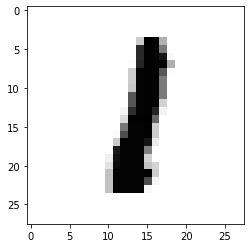

In [20]:
with tf.Session() as sess:
    # tensorboard --logdir=./logs/Deep_NN
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter(log_dir)
    writer.add_graph(sess.graph)
    
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
        # Test he model using test sets
        print('Accuracy: ', accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
        
        summary = sess.run(merged_summary, feed_dict={X:mnist.test.images, Y: mnist.test.labels})
        writer.add_summary(summary, global_step=(epoch))
        
        #print('Accuracy: ', sess.run(accuracy, feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples -1)
    print('Label:', sess.run(tf.arg_max(mnist.test.labels[r:r+1], 1)))
    print('Prediction:', sess.run(tf.arg_max(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()